# **ELEMENTOS FINITOS OLVER**

## **Ejemplo 14.9**

El método de elementos finitos también se puede aplicar a ecuaciones de Poisson en dos dimensiones, el texto de Olver se centra en problemas de condición de frontera de Dirichlet. La principal dificultad de estos problemas es que al dividir el dominio $\Omega$ hay mucha más libertad, y no es siempre posible partirlo uniformemente.  Para esto, se divide $\Omega$ escogiendo una triangulación dada por un conjunto finito de nodos en el dominio. En el ejemplo que implementamos el dominio es una región formada por un rectangulo de 2 metros de ancho y 1 de alto y al que se le agregan dos semicircunferencias a los lado. El texto nos da la siguiente triangulación:

In [ ]:
import sys
!{sys.executable} -m pip install --user numpy
!{sys.executable} -m pip install --user matplotlib

import matplotlib.pyplot as plt 
import matplotlib.tri as mtri
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

np.set_printoptions(suppress=True, precision=4, threshold=sys.maxsize)

El problema que consideramos consiste en encontrar la temperatura de equilibrio del  plato ovalado cuando se expone a una temperatura de -10 grados en el borde semicircular izquierdo,  10 grados en el borde semicircular derecho, y en los bordes rectos la temperartura varia linealmente de -10 a 10 grados. El espacio de dimensión finita al que queremos restringir nuestro problema es el de las funciones continuas afines a trozos que satisfacen las condiciones de frontera y tales que en cada triangulo son planas. la dimensión de este espacio será el numero de nodos de la triangulación y una base para dicha triangulación estará formada por las funciones piramide:

![alt text for screen readers](/home/tavera/projects/FiniteElements/FiniteElements/img/hat_3d.png )

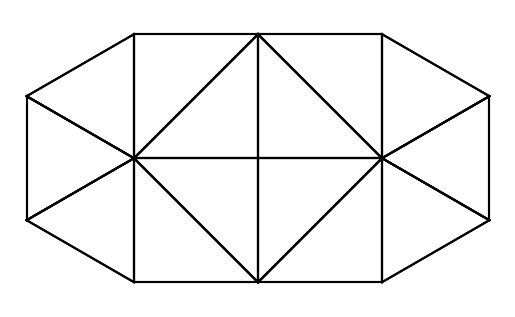

In [58]:
def pointsCoordenates():
    points = []
    triangles = []

    point1 = [0, 0.5]
    point2 = [0.5, 0.5]
    point3 = [1.0, 0.5]
    point4 = [0.5, 1.0]
    point5 = [0, 1.0]
    point6 = [(-(0.25*np.sqrt(3))), 0.75]
    point7 = [(-(0.25*np.sqrt(3))), 0.25]
    point8 = [0, 0]
    point9 = [0.5, 0]
    point10 = [1.0, 0]
    point11 = [1.0 + (0.25*np.sqrt(3)), 0.25]
    point12 = [1.0 + (0.25*np.sqrt(3)), 0.75]
    point13 = [1.0, 1.0]

    triangle1 = [1,5,6]
    triangle2 = [1,6,7]
    triangle3 = [1,7,8]
    triangle4 = [1,5,4]
    triangle5 = [1,2,4]
    triangle6 = [2,3,4]
    triangle7 = [3,4,13]
    triangle8 = [1,8,9]
    triangle9 = [1,2,9]
    triangle10 = [2,3,9]
    triangle11 = [3,9,10]
    triangle12 = [3,12,13]
    triangle13 = [3,11,12]
    triangle14 = [3,11,10]

    for i in range(1,14):
         points.append(eval("point" + str(i)))
    
    for i in range(1,15):
         triangles.append(eval("triangle" + str(i)))

    return points, triangles
    
def graphPoints(points, triangles):
     for triangle in triangles:
          for point1 in triangle:
               for point2 in triangle:
                    coordpoint1 = points[point1 - 1]
                    coordpoint2 = points[point2 - 1]

                    x_values = [coordpoint1[0], coordpoint2[0]]
                    y_values = [coordpoint1[1], coordpoint2[1]]

                    plt.plot(x_values, y_values, color="black")



     plt.xlim(-0.5, 1.5)
     plt.ylim(-0.1, 1.1)
     plt.gca().set_aspect('equal', adjustable='box')
     plt.axis('off')
     plt.show()

     return None

def getAngles(points, triangles):
    triangle_angles = []
    for triangle in triangles:
        angles = []
        for i, point_index in enumerate(triangle):
            point = points[point_index - 1]
            if i == 0:
                pointa = points[triangle[1]-1]
                pointc = points[triangle[2]-1]
            
            if i == 1:
                pointa = points[triangle[0]-1]
                pointc = points[triangle[2]-1]

            if i == 2:
                pointa = points[triangle[0]-1]
                pointc = points[triangle[1]-1]

            a = np.array(pointa)
            b = np.array(point)
            c = np.array(pointc)

            ba = a - b
            bc = c - b

            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))

            angle = np.arccos(cosine_angle)
            angle = round(np.degrees(angle))
            

            angles.append(angle)

        triangle_angles.append(angles)
    
    return triangle_angles

points = pointsCoordenates()[0]
triangles = pointsCoordenates()[1]

graphPoints(points, triangles)



                    

In [109]:
points = pointsCoordenates()[0]
triangles = pointsCoordenates()[1]
angles = getAngles(points, triangles)



def KStar(points, triangles, angles):
    K_matrix = np.zeros((len(points), len(points)))

    for v, triangle in enumerate(triangles):
        K_triangle = np.zeros((len(points), len(points)))

        for i, point_index_i in enumerate(triangle):
            for j, point_index_j in enumerate(triangle): 
                if i == j:
                    if i == 0:
                        angle_1 = 1/np.tan(np.radians(angles[v][1])) 
                        angle_2 = 1/np.tan(np.radians(angles[v][2])) 
                        k_entry = 0.5*(angle_1 + angle_2)
                        K_triangle[point_index_i-1,point_index_j-1] = k_entry

                    if i == 1:
                        angle_1 = 1/np.tan(np.radians(angles[v][0])) 
                        angle_2 = 1/np.tan(np.radians(angles[v][2])) 
                        k_entry = 0.5*(angle_1 + angle_2)
                        K_triangle[point_index_i-1,point_index_j-1] = k_entry

                    if i == 2:
                        angle_1 = 1/np.tan(np.radians(angles[v][1])) 
                        angle_2 = 1/np.tan(np.radians(angles[v][0])) 
                        k_entry = 0.5*(angle_1 + angle_2)
                        K_triangle[point_index_i-1,point_index_j-1] = k_entry
                else:
                    for m in range(3):
                        if (m != i) and (m != j) :
                            angle = 1/np.tan(np.radians(angles[v][m])) 
                            k_entry = (-1/2)*(angle)
                            K_triangle[point_index_i-1,point_index_j-1] = k_entry
                            K_triangle[point_index_j-1,point_index_i-1] = k_entry
                
            
        K_matrix += K_triangle
    
    return K_matrix  

def KMatrix(K_matrix):
    K_star = K_matrix[0:3, 0:3]
    return K_star

def KTilde(K_matrix):
    K_star = K_matrix[0:3, 3:14]
    return K_star


K_star = KStar(points, triangles, angles)
K_matrix = KMatrix(K_star)
K_tilde = KTilde(K_star)

print('K = ')
print(K_matrix)

print('')

print('K_tilde = ')
print(K_tilde)

print('')

print('K_star = ')
print(K_star)






K = 
[[ 3.7321 -1.      0.    ]
 [-1.      4.     -1.    ]
 [ 0.     -1.      3.7321]]

K_tilde = 
[[-0.     -0.7887 -0.5774 -0.5774 -0.7887 -0.      0.      0.      0.
   0.    ]
 [-1.      0.      0.      0.      0.     -1.      0.      0.      0.
   0.    ]
 [-0.      0.      0.      0.      0.     -0.     -0.7887 -0.5774 -0.5774
  -0.7887]]

K_star = 
[[ 3.7321 -1.      0.     -0.     -0.7887 -0.5774 -0.5774 -0.7887 -0.
   0.      0.      0.      0.    ]
 [-1.      4.     -1.     -1.      0.      0.      0.      0.     -1.
   0.      0.      0.      0.    ]
 [ 0.     -1.      3.7321 -0.      0.      0.      0.      0.     -0.
  -0.7887 -0.5774 -0.5774 -0.7887]
 [-0.     -1.     -0.      2.     -0.5     0.      0.      0.      0.
   0.      0.      0.     -0.5   ]
 [-0.7887  0.      0.     -0.5     1.5774 -0.2887  0.      0.      0.
   0.      0.      0.      0.    ]
 [-0.5774  0.      0.      0.     -0.2887  1.1547 -0.2887  0.      0.
   0.      0.      0.      0.    ]
 [-0.5774  0

In [110]:

def h_vector():
    h = [0,-10,-10,-10,-10,0,10,10,10,10]
    h = np.array(h)
    h = np.transpose(np.matrix(h))
    return h 

h = h_vector()

def c_vector(K_matrix, K_tilde, h_vector):

    K_inverse = np.linalg.inv(K_matrix)
    c = (K_inverse.dot(K_tilde)).dot(h_vector)
    c = (-1)*c
    c = np.transpose(c)

    return c

print(c_vector(K_matrix, K_tilde, h))




[[-7.3205  0.      7.3205]]


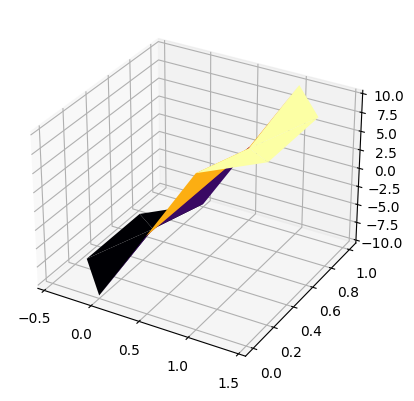

In [111]:
c = c_vector(K_matrix, K_tilde, h)

def surfaceFig(h, c, points, triangles):
    h = np.transpose(h)
    h = h.tolist()
    h = h[0]
    c = c.tolist()
    c = c[0]
    z = c + h
    my_cmap = plt.get_cmap('inferno')

    modify_triangles = []
    for triangle in triangles:
        modify_triangle = []
        for point in triangle:
            modify_triangle.append(point - 1)
        modify_triangles.append(modify_triangle)

    xy = np.array(points)
    triang = mtri.Triangulation(xy[:,0], xy[:,1], triangles=modify_triangles)
    fig, ax = plt.subplots(subplot_kw =dict(projection="3d", adjustable='box'))
    ax.plot_trisurf(triang, z, cmap = my_cmap)
    plt.show()

    return None

(surfaceFig(h,c, points, triangles))